Epochs :   0%|          | 0/1000 [00:00<?, ?it/s]

Cost at iteration 0: 0.3946946859359741
Cost at iteration 100: 0.2322331815958023
Cost at iteration 200: 0.15202762186527252
Cost at iteration 300: 0.11143843084573746
Cost at iteration 400: 0.08824726194143295
Cost at iteration 500: 0.07335712760686874
Cost at iteration 600: 0.0629226490855217
Cost at iteration 700: 0.05501626804471016
Cost at iteration 800: 0.049147628247737885
Cost at iteration 900: 0.044687528163194656
Cost at iteration 999: 0.04120911285281181


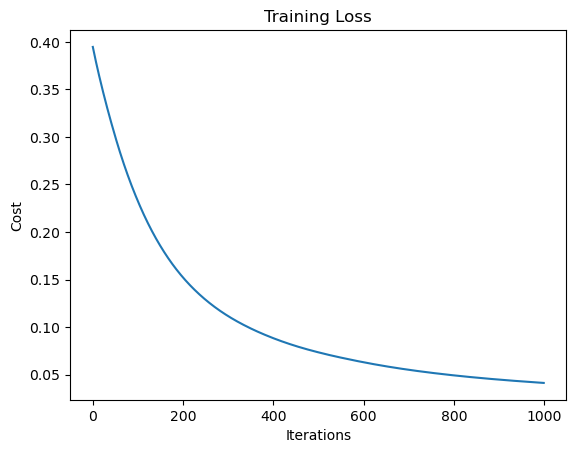

Test Accuracy: 0.9737


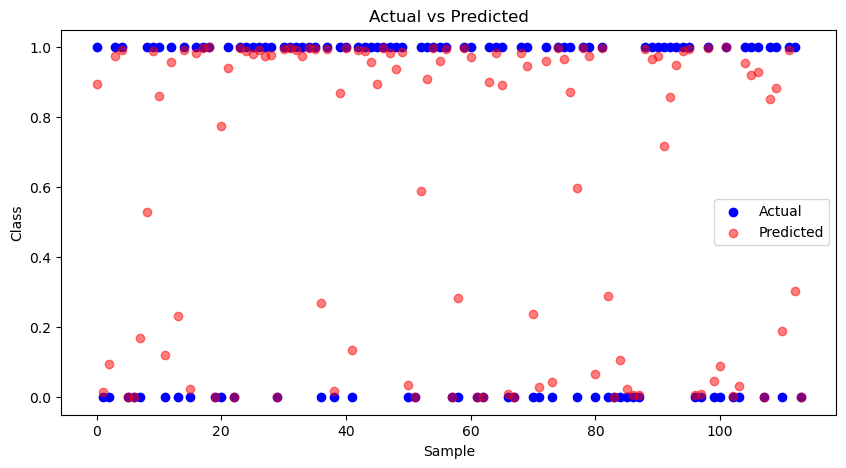

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [12]:
import torch
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nn import NeuralNetwork
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)

# Define the neural network architecture
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1
layer_dims = [input_size, hidden_size, output_size]

# Create and train the model
model = NeuralNetwork(layer_dims)
costs = model.train(X_train_tensor, y_train_tensor, num_iterations=1000, learning_rate=0.01)

# Plot the training loss
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training Loss')
plt.show()

# Evaluate the model on the test set
y_pred = model.predict(X_test_tensor)
y_pred_binary = (y_pred > 0.5).float()

accuracy = (y_pred_binary == y_test_tensor).float().mean()
print(f"Test Accuracy: {accuracy.item():.4f}")

# Plot some predictions
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred.squeeze().detach().numpy(), color='red', alpha=0.5, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Class')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_binary.squeeze().numpy()))

Epochs :   0%|          | 0/1000 [00:00<?, ?it/s]

Cost at iteration 0: 0.2536933422088623
Cost at iteration 100: 0.23411430418491364
Cost at iteration 200: 0.2180473953485489
Cost at iteration 300: 0.20399793982505798
Cost at iteration 400: 0.191365048289299
Cost at iteration 500: 0.1804165095090866
Cost at iteration 600: 0.17075276374816895
Cost at iteration 700: 0.16199183464050293
Cost at iteration 800: 0.15399467945098877
Cost at iteration 900: 0.14678077399730682
Cost at iteration 999: 0.1404346525669098


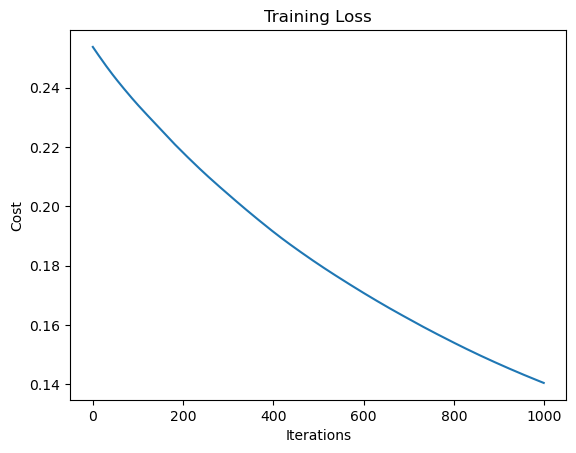

Test Accuracy: 0.9386


In [13]:
# training the model on gpu
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

model = NeuralNetwork(layer_dims).to(device)

costs = model.train(X_train_tensor, y_train_tensor, num_iterations=1000, learning_rate=0.001)

# Plot the training loss
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training Loss')
plt.show()

# Evaluate the model on the test set
y_pred = model.predict(X_test_tensor)
y_pred_binary = (y_pred > 0.5).float()

accuracy = (y_pred_binary == y_test_tensor).float().mean()


print(f"Test Accuracy: {accuracy.item():.4f}")

# Testing Softmax

tensor([[0.5286, 0.4714],
        [0.5248, 0.4752],
        [0.5448, 0.4552],
        [0.5241, 0.4759],
        [0.5391, 0.4609],
        [0.5598, 0.4402],
        [0.5570, 0.4430],
        [0.5622, 0.4378],
        [0.5713, 0.4287],
        [0.5331, 0.4669],
        [0.5244, 0.4756],
        [0.5493, 0.4507],
        [0.5235, 0.4765],
        [0.5699, 0.4301],
        [0.5273, 0.4727],
        [0.5523, 0.4477],
        [0.5580, 0.4420],
        [0.5458, 0.4542],
        [0.5315, 0.4685],
        [0.5189, 0.4811],
        [0.5357, 0.4643],
        [0.5163, 0.4837],
        [0.5283, 0.4717],
        [0.5615, 0.4385],
        [0.5335, 0.4665],
        [0.5581, 0.4419],
        [0.5502, 0.4498],
        [0.5689, 0.4311],
        [0.5372, 0.4628],
        [0.5600, 0.4400]])
Initial parameters:
W1:
tensor([[-0.1063,  0.8302],
        [ 0.0123, -0.9196],
        [ 1.0028, -0.4559]])

b1:
tensor([[0.],
        [0.],
        [0.]])

W2:
tensor([[ 0.1154,  0.5919,  1.4816],
        [ 0.3854, -1

Epochs :   0%|          | 0/50 [00:00<?, ?it/s]

Cost at iteration 0: 0.69957035779953
Cost at iteration 49: 0.6933602094650269
Final parameters:
W1:
tensor([[-0.1056,  0.8259],
        [ 0.0121, -0.9183],
        [ 1.0008, -0.4530]])

b1:
tensor([[-0.0039],
        [-0.0014],
        [-0.0016]])

W2:
tensor([[ 0.1133,  0.5898,  1.4792],
        [ 0.3767, -1.2055, -0.7407],
        [-0.2513, -0.3409, -0.2408],
        [-0.6846, -0.2919, -0.8401]])

b2:
tensor([[-0.0049],
        [-0.0095],
        [ 0.0000],
        [ 0.0000]])

W3:
tensor([[-1.2219, -1.2291, -0.1214, -0.4211],
        [ 0.0346,  0.3562,  0.0776,  0.5642],
        [-0.0468, -0.1884,  0.9523, -0.1539]])

b3:
tensor([[ 0.0000],
        [-0.0675],
        [ 0.0000]])

W4:
tensor([[-0.0204, -0.2551,  0.3906],
        [ 0.2465,  0.5724, -0.2896]])

b4:
tensor([[-0.2630],
        [-0.2704]])

Expected Output: 
tensor([[0.1774, 0.8226]])
Predicted data based on trained weights: 
Input: 
tensor([[4., 8.]])
Output: 
tensor([[0.1763, 0.8237]])


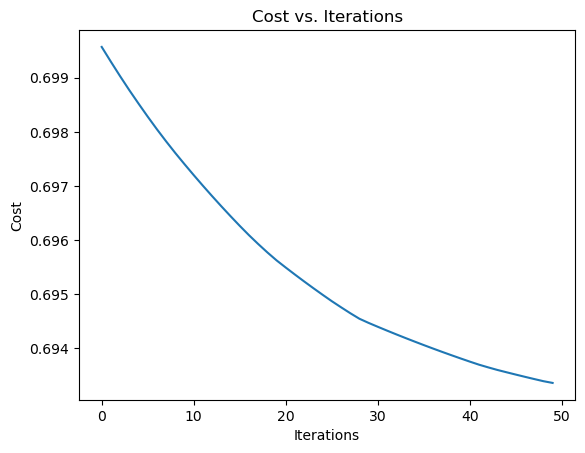

In [14]:
import torch 
from nn import NeuralNetwork
from sklearn.preprocessing import StandardScaler

# create 30 tensors of 2 random numbers
X = torch.rand(30, 2, dtype=torch.float)
actual_w = torch.rand(2, 2, dtype=torch.float)
actual_b = torch.rand(2, 1, dtype=torch.float)

y = torch.mm(X, actual_w) + actual_b.T
y = torch.softmax(y, dim=1)  # Apply softmax to get probabilities
print(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = torch.tensor(X_scaled, dtype=torch.float)

layer_dims = [2, 3, 4, 3, 2]

model = NeuralNetwork(layer_dims)

print("Initial parameters:")
for key, value in model.params.items():
    print(f"{key}:\n{value}\n")
    

costs = model.train(X_scaled, y, num_iterations=50, learning_rate=0.01)

print("Final parameters:")
for key, value in model.params.items():
    print(f"{key}:\n{value}\n")

X_test = torch.tensor([[4, 8]], dtype=torch.float)  # 1 x 2 tensor
y_test = torch.mm(X_test, actual_w) + actual_b.T
y_test = torch.softmax(y_test, dim=1)
print("Expected Output: \n" + str(y_test))
X_test_scaled = torch.tensor(scaler.transform(X_test), dtype=torch.float)

print("Predicted data based on trained weights: ")
print("Input: \n" + str(X_test))
print("Output: \n" + str(model.predict(X_test_scaled)))

# Plot the cost over iterations
import matplotlib.pyplot as plt

plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()